In [2]:
from matplotlib import pyplot as plt
import json
import numpy as np
import os

In [22]:
# Opening JSON file
f = open('/mnt/mturk/cf_sample_data/times_all_lt_1mb.json')
time_data = json.load(f)
f.close()

In [27]:
microseconds = np.array([x[1] for x in time_data if x[2] == "s"])
seconds = microseconds / 1e6

/tmp/ipykernel_980789/3646684432.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('execution-time-distribution.png', figsize=(4,4), dpi=300)


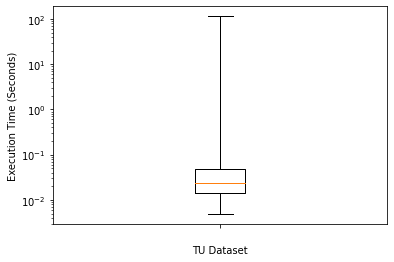

In [29]:
plt.ylabel('Execution Time (Seconds)')
plt.xlabel('TU Dataset')
plt.yscale('log')
plt.xticks(color='#00000000')
plt.boxplot(seconds, whis = (0,100))
plt.savefig('execution-time-distribution.png', figsize=(4,4), dpi=300)

In [26]:
sum(seconds > 100)

2

{'whiskers': [<matplotlib.lines.Line2D at 0x7f48cf990820>,
 'caps': [<matplotlib.lines.Line2D at 0x7f48cf990dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f48cf990550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f48cf92e3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f48cf92e670>],
 'means': []}

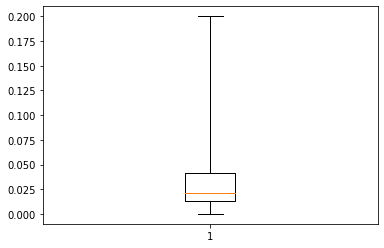

In [5]:
filtered_seconds = seconds[seconds < 0.2]
plt.boxplot(filtered_seconds, whis = (0,100))

In [3]:
pretrain_location = '/mnt/mturk/cf_sample_data/deduplicated_code_fill_pretrain'
sizes = []
linecounts = []
for elem in os.scandir(pretrain_location):
    size = os.path.getsize(elem)
    sizes.append([elem.name,size])
    # if size > 1_00_000:
        
    #     with open(elem, 'r', encoding="latin-1") as fp:
    #         lines = len(fp.readlines())
    #         if lines < 10:
    #             print(elem.name, lines, size)
    #         linecounts.append(lines)

# np_lc = np.array(linecounts)

# np.max(np_lc), np.min(np_lc), np.median(np_lc), np.average(np_lc)




In [7]:
np_sizes = np.array([x[1] for x in sizes])


In [5]:
sum(np_sizes > 1e6)


616

/tmp/ipykernel_980789/3580858677.py:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('file-size-distribution.png', figsize=(4,4), dpi=300)


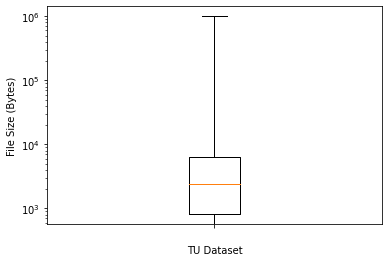

In [20]:
size_bytes_filtered = np_sizes[np_sizes < 1_000_000]
plt.ylabel('File Size (Bytes)')
plt.xlabel('TU Dataset')
plt.yscale('log')
# plt.ylim([0, 1e6])
ax = plt.gca()
# ax.axes.xaxis.set_ticklabels([])
plt.xticks(color='#00000000')
plt.boxplot(size_bytes_filtered, whis = (0,100))
# plt.figure()
plt.
plt.savefig('file-size-distribution.png', figsize=(4,4), dpi=300)